In [1]:
import zipfile
import os

In [2]:
# Path to the uploaded ZIP file
zip_path = '/content/drive/MyDrive/Doc Scanner/ACCIDENT DATA TASK 4.zip'
extract_path = '/content/drive/MyDrive/Doc Scanner/ACCIDENT DATA TASK 4'

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

extracted_files = os.listdir(extract_path)
extracted_files

['Areas.shp',
 'Local_Authority_Districts_Dec_2016.geojson',
 'accident_coords_update.ipynb',
 'accidents_2005_to_2007.csv',
 'accidents_2009_to_2011.csv',
 'accidents_2012_to_2014.csv',
 'ukTrafficAADF.csv']

In [3]:
import pandas as pd

In [4]:
accidents_2005_2007_path = os.path.join(extract_path, 'accidents_2005_to_2007.csv')
accidents_2005_2007_df = pd.read_csv(accidents_2005_2007_path)

accidents_2005_2007_df.head(), accidents_2005_2007_df.columns


<ipython-input-4-ae094abe14ea>:2: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  accidents_2005_2007_df = pd.read_csv(accidents_2005_2007_path)


(  Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
 0  200501BS00001               525680.0                178240.0  -0.191170   
 1  200501BS00002               524170.0                181650.0  -0.211708   
 2  200501BS00003               524520.0                182240.0  -0.206458   
 3  200501BS00004               526900.0                177530.0  -0.173862   
 4  200501BS00005               528060.0                179040.0  -0.156618   
 
     Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
 0  51.489096             1                  2                   1   
 1  51.520075             1                  3                   1   
 2  51.525301             1                  3                   2   
 3  51.482442             1                  3                   1   
 4  51.495752             1                  3                   1   
 
    Number_of_Casualties        Date  ...  \
 0                     1  04/01/2005  ...   
 1          

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

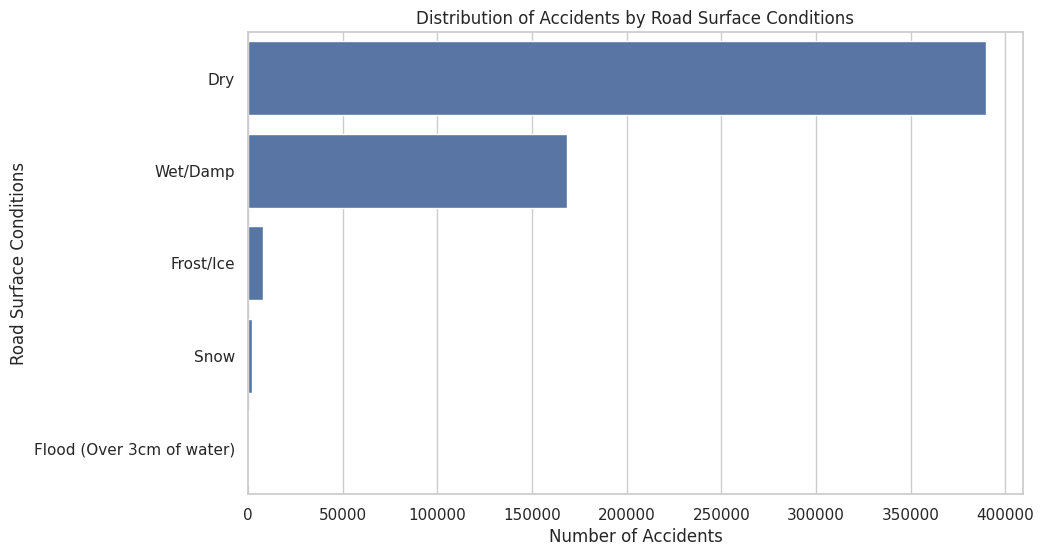

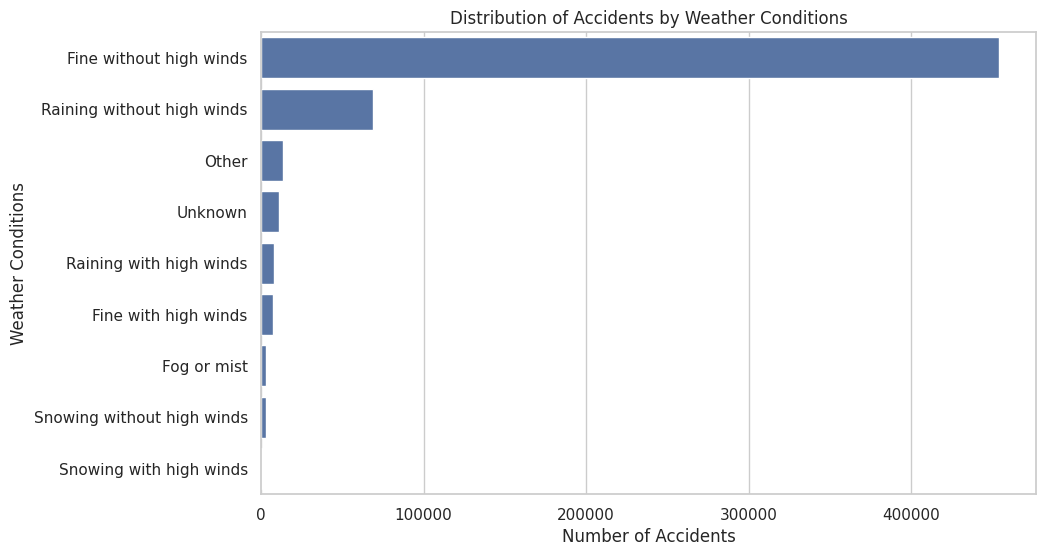

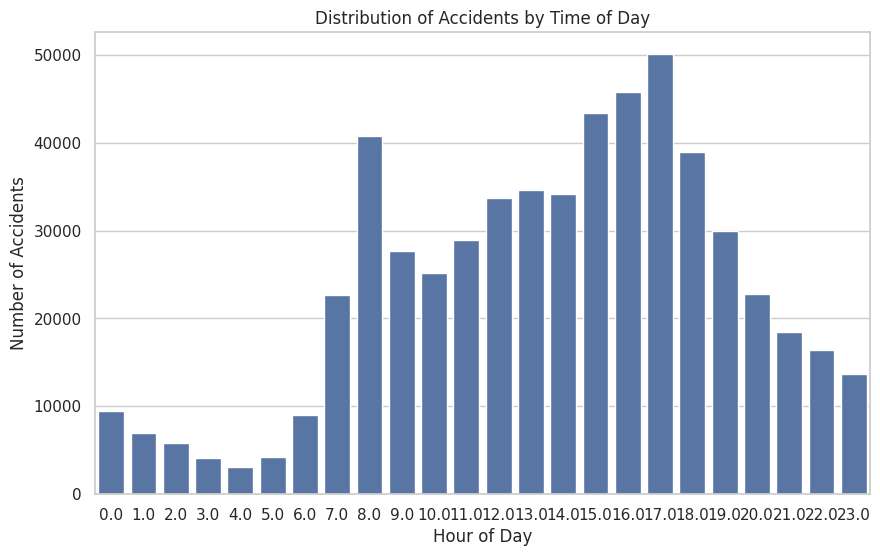

In [6]:

sns.set(style="whitegrid")
accidents_2005_2007_df['Date'] = pd.to_datetime(accidents_2005_2007_df['Date'], format='%d/%m/%Y', errors='coerce')
accidents_2005_2007_df['Time'] = pd.to_datetime(accidents_2005_2007_df['Time'], format='%H:%M', errors='coerce').dt.time
accidents_2005_2007_df['DateTime'] = pd.to_datetime(accidents_2005_2007_df['Date'].astype(str) + ' ' + accidents_2005_2007_df['Time'].astype(str), errors='coerce')
accidents_2005_2007_df['Hour'] = accidents_2005_2007_df['DateTime'].dt.hour

plt.figure(figsize=(10, 6))
sns.countplot(y='Road_Surface_Conditions', data=accidents_2005_2007_df, order=accidents_2005_2007_df['Road_Surface_Conditions'].value_counts().index)
plt.title('Distribution of Accidents by Road Surface Conditions')
plt.xlabel('Number of Accidents')
plt.ylabel('Road Surface Conditions')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(y='Weather_Conditions', data=accidents_2005_2007_df, order=accidents_2005_2007_df['Weather_Conditions'].value_counts().index)
plt.title('Distribution of Accidents by Weather Conditions')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Conditions')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=accidents_2005_2007_df)
plt.title('Distribution of Accidents by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()


<ipython-input-8-8360428dd916>:10: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  accidents_2005_2007_df = pd.read_csv('/content/drive/MyDrive/Doc Scanner/ACCIDENT DATA TASK 4/accidents_2005_to_2007.csv')  # Ensure this path is correct


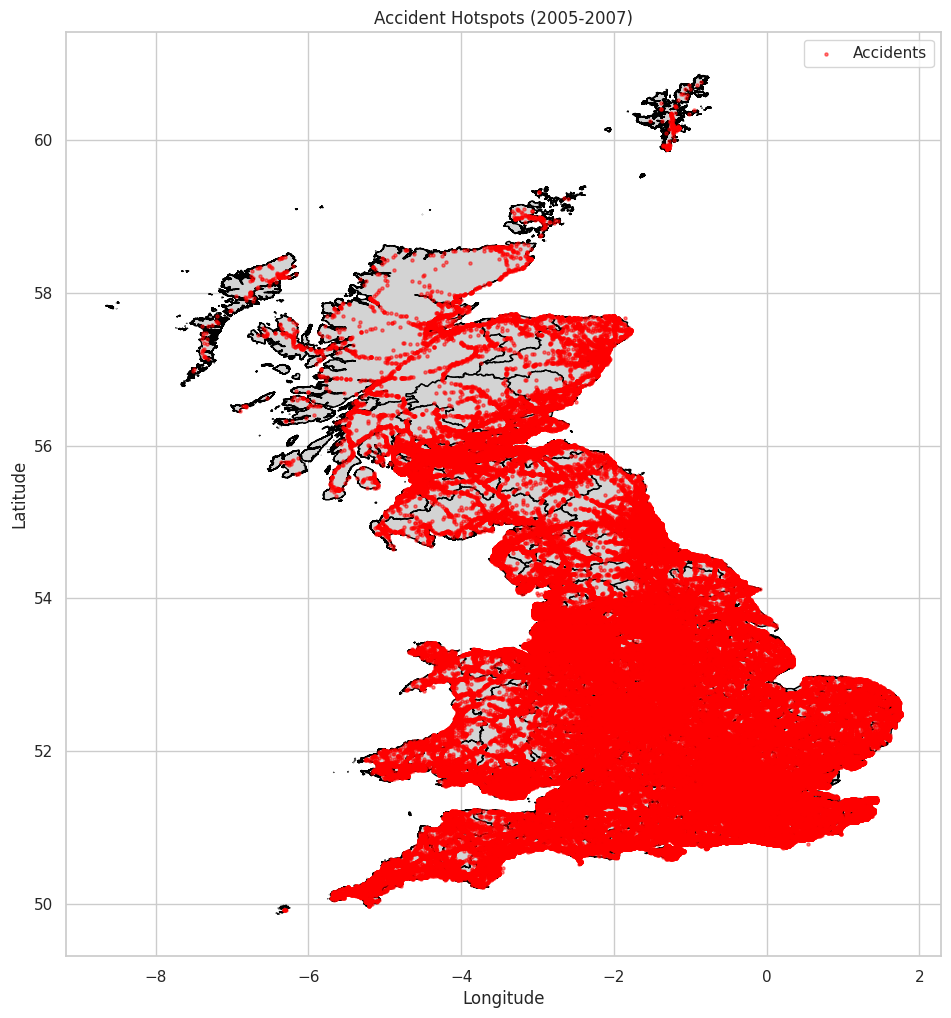

In [8]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load the geographic data from the GeoJSON file
local_authority_path = '/content/drive/MyDrive/Doc Scanner/ACCIDENT DATA TASK 4/Local_Authority_Districts_Dec_2016.geojson'
local_authority_gdf = gpd.read_file(local_authority_path)

# Sample accident data (replace this with actual accident data loading)
accidents_2005_2007_df = pd.read_csv('/content/drive/MyDrive/Doc Scanner/ACCIDENT DATA TASK 4/accidents_2005_to_2007.csv')  # Ensure this path is correct

# Create a GeoDataFrame for accidents
geometry = [Point(xy) for xy in zip(accidents_2005_2007_df['Longitude'], accidents_2005_2007_df['Latitude'])]
accidents_gdf = gpd.GeoDataFrame(accidents_2005_2007_df, geometry=geometry)

# Plot the accident hotspots on the map
fig, ax = plt.subplots(figsize=(12, 12))
local_authority_gdf.plot(ax=ax, color='lightgrey', edgecolor='black')
accidents_gdf.plot(ax=ax, markersize=5, color='red', alpha=0.5, label='Accidents')

plt.title('Accident Hotspots (2005-2007)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()